In [2]:
from scipy.integrate import quad as integrate, trapz 
from scipy import interpolate
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

## 1. Зависимости среднего значения разности фаз и ее стандартного отклонения на всем промежутке времени для разных значений затухания и фиксированного значения времени переключения. 
### Ожидание: показать как влияе затухание на "определенность" тока

In [3]:
lq = 3
Num = 100_000 # количество генерируемых точек
hxi = 0.01*np.pi # шаг генерации
beta = 0.0276 # температурный делитель
l = 2*np.pi # область генерации начального распределения
n = int(l/hxi)
phix = 0 # 

In [4]:
LL = 10*np.pi # интервал, на котором производится интегрирование
X = np.linspace(-LL/2, LL/2, 10_000)

def fun(x): # функция распределения
    return np.exp((np.cos(x)-1)/beta)*np.exp(-((x-phix)**2)/(2*lq*beta))
part_func = trapz(fun(X), X)
# print('Статсумма = ', part_func, 'в математике получили 6.39276*10^-20 при phix = Pi')

In [5]:
def U(x): 
    return (x-phix)**2/(2*lq) + 1 - np.cos(x)

def coor_destr(x):
    return np.exp(-U(x)/beta)/part_func

xi = np.linspace(-np.pi + phix, np.pi + phix, n)
# применяем определение функции распределения
def prob(xx):
    return integrate(lambda phi: coor_destr(phi), -np.inf, xx)[0]

In [6]:
alpha = []
for xx in xi:
    alpha.append(prob(xx))

inter_func = interpolate.interp1d(alpha, xi)


In [7]:
# параметры
# gamma = 0.01 # коэффициент затухания
tau = 1000 # характерное время переключения
T = 1000 # полный интервал времени
dt = 0.1 # шаг по времени
t = np.linspace(0,T, int(T/dt))

In [8]:
def phixx(t): # функция именения параметра управления
    return np.pi*(np.tanh(2*np.pi*t/tau - np.pi)+1) 
    
def H(t, phi, p):
    return p**2/2 + (phi-phixx(t))**2/(2*lq) + 1 - np.cos(phi)

def F(t, phi, p):
    return p, -np.sin(phi) - (phi - phix - np.pi*(np.tanh(2*np.pi*t/tau - np.pi)+1))/lq - gamma*p

100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [05:25<00:00, 30.76it/s]


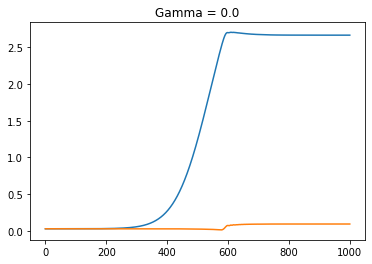

100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [05:12<00:00, 31.97it/s]


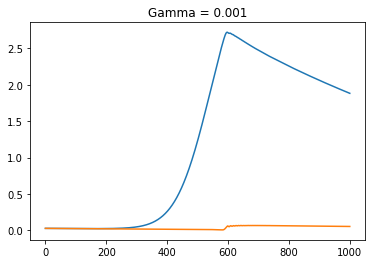

100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [05:07<00:00, 32.49it/s]


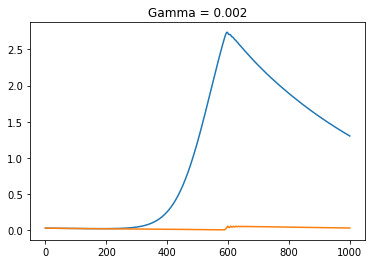

100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [05:16<00:00, 31.62it/s]


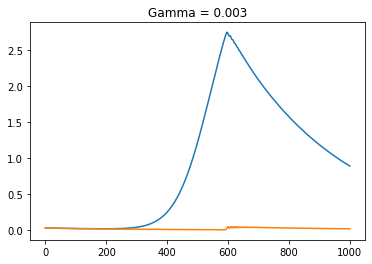

100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [05:00<00:00, 33.23it/s]


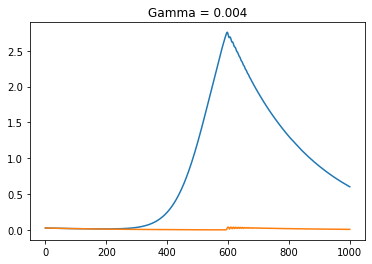

100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [04:54<00:00, 33.99it/s]


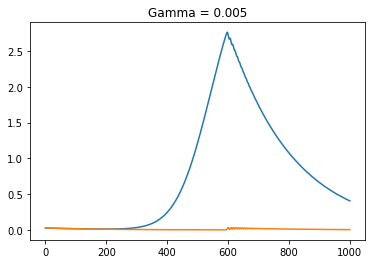

100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [05:54<00:00, 28.22it/s]


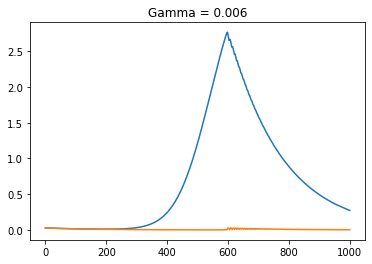

100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [06:40<00:00, 24.97it/s]


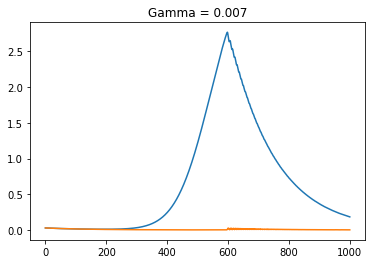

100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [05:53<00:00, 28.29it/s]


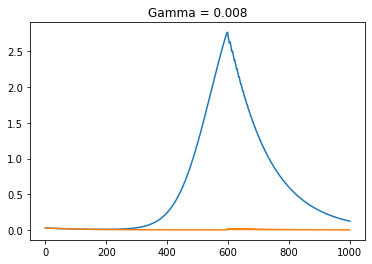

100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [05:15<00:00, 31.67it/s]


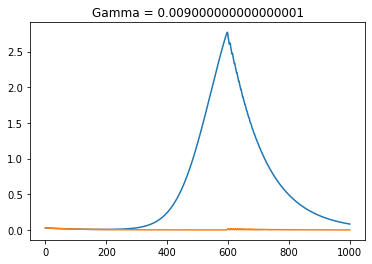

100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [05:14<00:00, 31.82it/s]


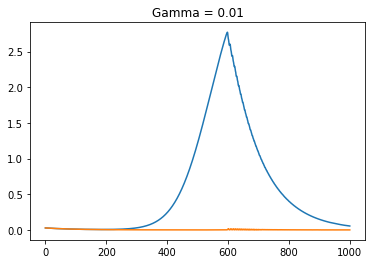

100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [03:58<00:00, 41.99it/s]


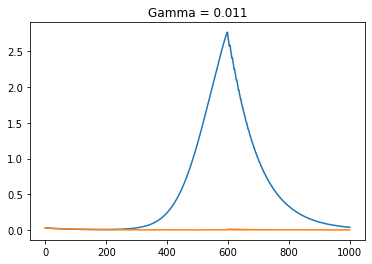

100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [03:55<00:00, 42.43it/s]


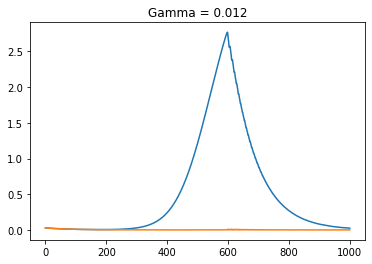

100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [04:01<00:00, 41.47it/s]


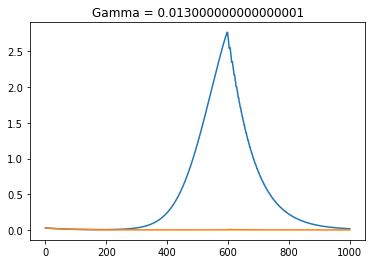

100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [22:40<00:00,  7.35it/s]


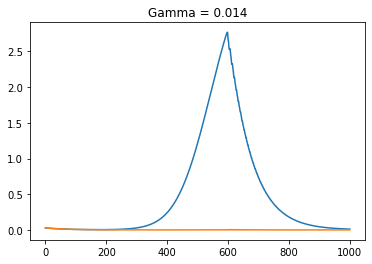

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [01:35<00:00, 104.35it/s]


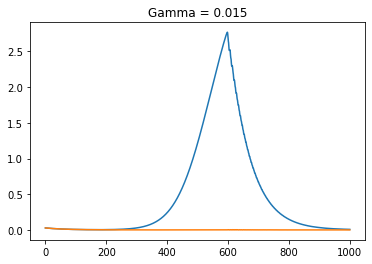

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [01:31<00:00, 109.37it/s]


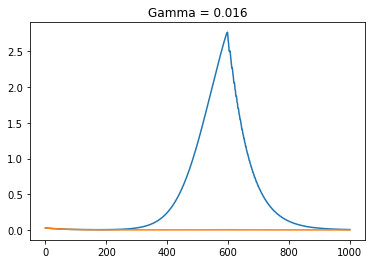

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [01:33<00:00, 106.65it/s]


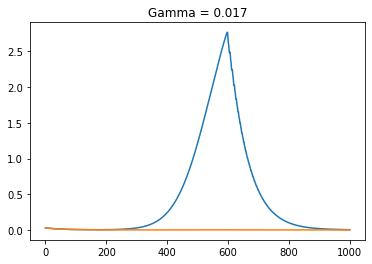

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [01:39<00:00, 100.12it/s]


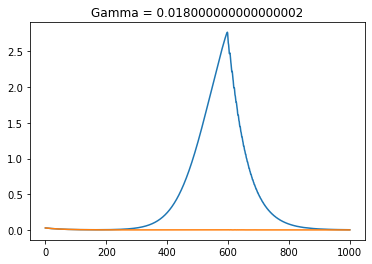

100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [01:46<00:00, 93.87it/s]


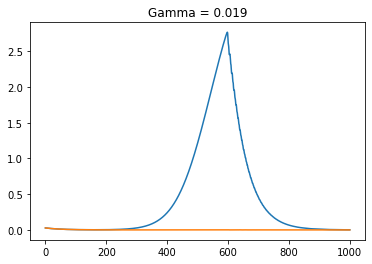

100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [01:53<00:00, 88.23it/s]


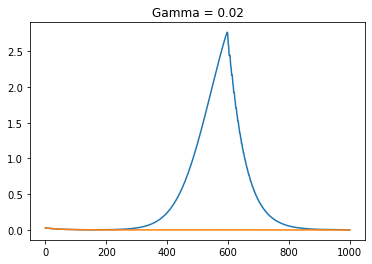

100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [01:51<00:00, 89.91it/s]


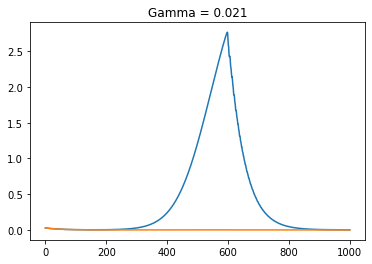

100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [01:57<00:00, 85.30it/s]


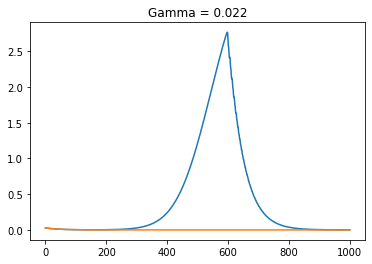

100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [02:13<00:00, 74.95it/s]


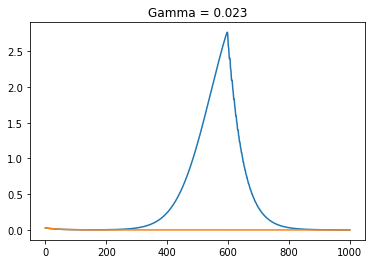

100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [02:11<00:00, 76.28it/s]


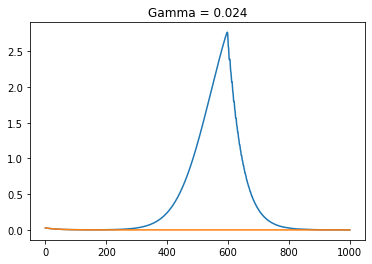

100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [02:09<00:00, 77.32it/s]


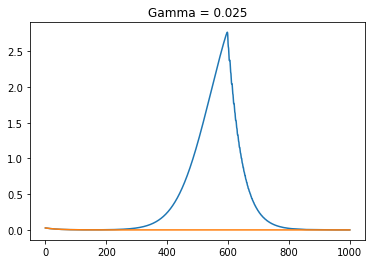

100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [02:20<00:00, 71.30it/s]


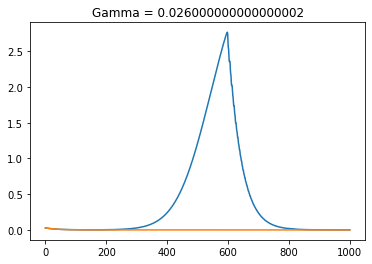

100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [02:10<00:00, 76.67it/s]


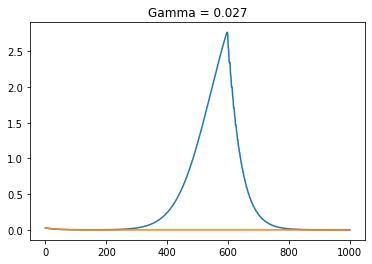

100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [02:24<00:00, 69.30it/s]


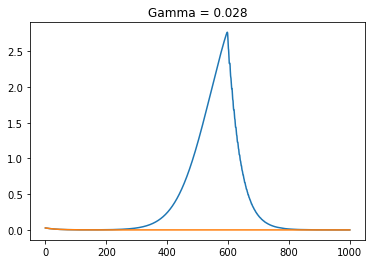

100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [02:20<00:00, 71.11it/s]


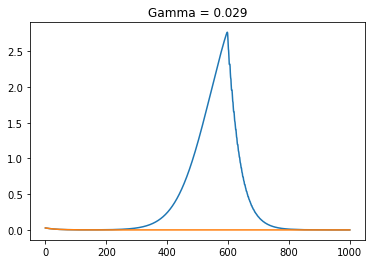

100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [02:28<00:00, 67.16it/s]


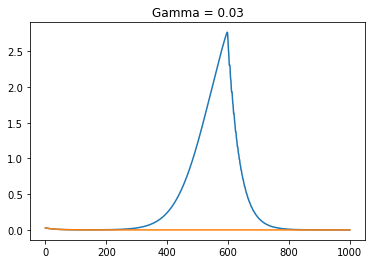

100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [03:16<00:00, 50.94it/s]


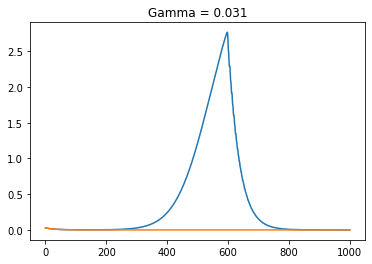

100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [02:50<00:00, 58.60it/s]


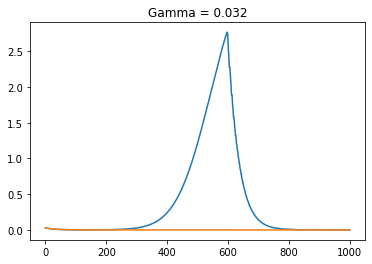

100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [02:59<00:00, 55.85it/s]


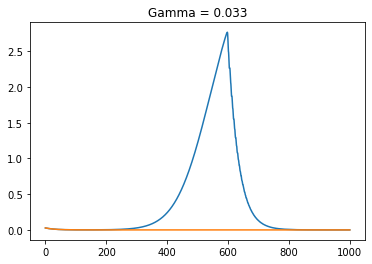

100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [02:51<00:00, 58.36it/s]


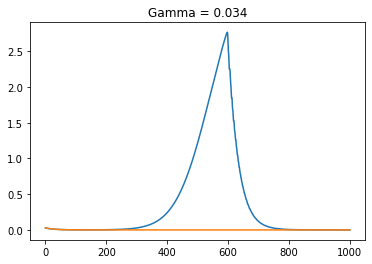

100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [03:18<00:00, 50.36it/s]


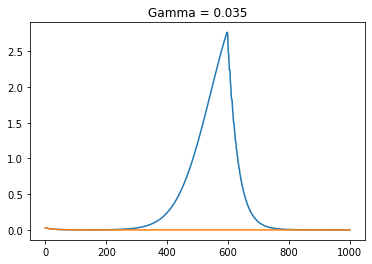

100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [03:04<00:00, 54.08it/s]


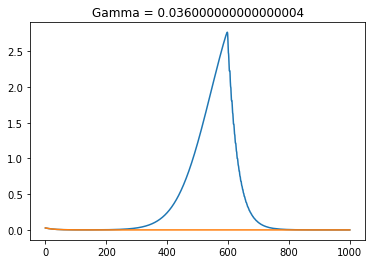

100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [02:51<00:00, 58.28it/s]


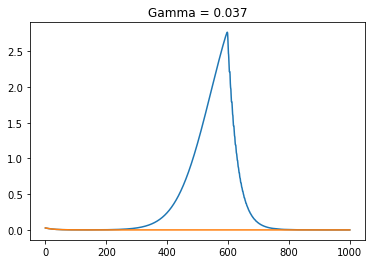

100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [02:38<00:00, 63.22it/s]


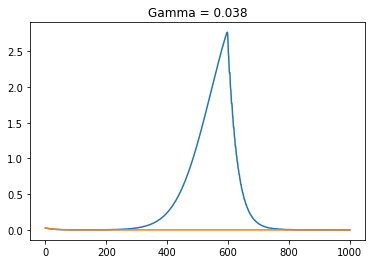

100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [03:02<00:00, 54.75it/s]


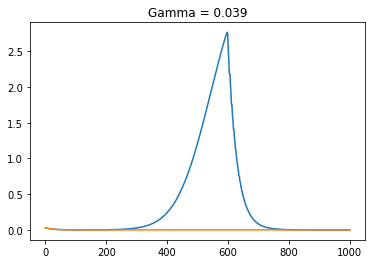

100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [02:54<00:00, 57.47it/s]


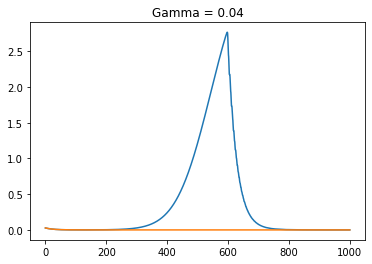

100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [02:49<00:00, 58.89it/s]


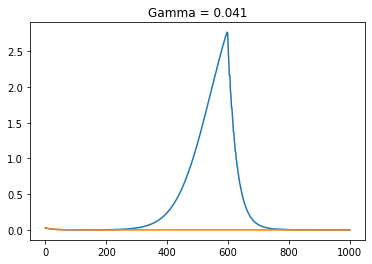

100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [03:22<00:00, 49.38it/s]


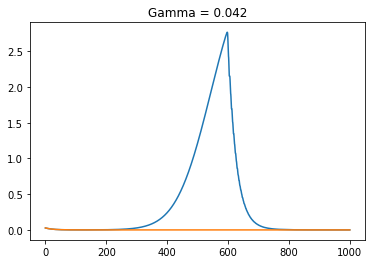

100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [02:34<00:00, 64.81it/s]


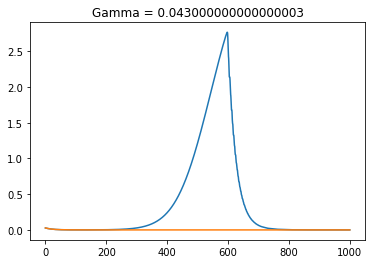

100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [02:45<00:00, 60.40it/s]


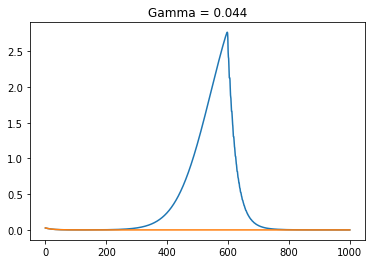

100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [02:23<00:00, 69.59it/s]


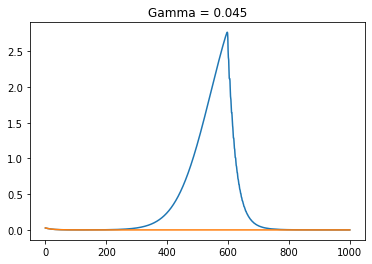

100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [02:45<00:00, 60.27it/s]


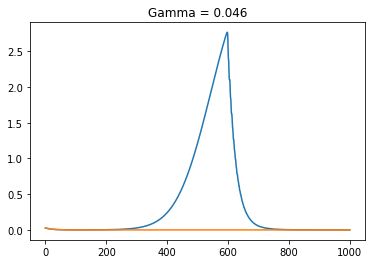

100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [02:30<00:00, 66.32it/s]


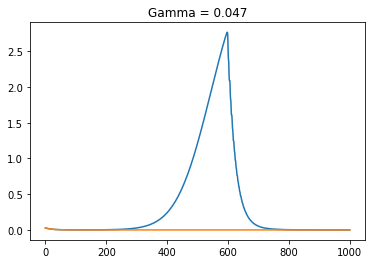

100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [03:52<00:00, 43.01it/s]


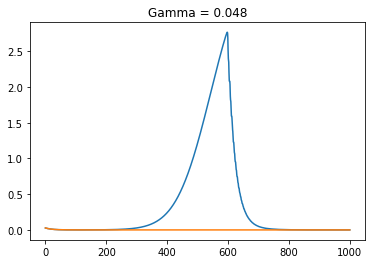

100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [04:19<00:00, 38.60it/s]


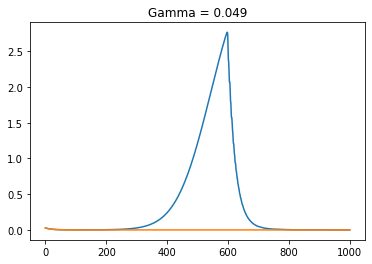

100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [04:24<00:00, 37.80it/s]


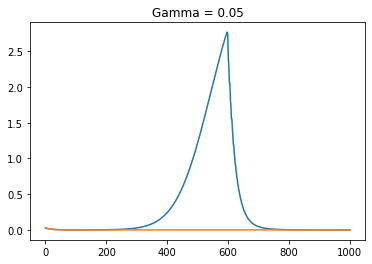

In [9]:
# средняя энергия по точкам от времени для разных гамма
# блять, надо было с нуля начинать gamma
g = np.arange(0, 0.051, 0.001)
for gamma in g:
    energy_mean = []
    energy_std = []
    # начальное распределение
    np.random.seed(1997)
    random_points = np.random.random(Num) # Num случайныйх равномерно распределеных чисел [0,1]
    phi_points = inter_func(random_points) # значения phi c требуемым распределением
    p_points = np.random.normal(0, np.sqrt(beta), Num)
    # главный цикл
    for it in tqdm(t):
        k1 = F(it, phi_points, p_points)
        k2 = F(it+dt/2, phi_points + dt*k1[0]/2, p_points + dt*k1[1]/2)
        k3 = F(it+dt/2, phi_points + dt*k2[0]/2, p_points + dt*k2[1]/2)
        k4 = F(it+dt, phi_points + dt*k3[0], p_points + dt*k3[1])
        phi_points = phi_points + dt*(k1[0]+2*k2[0]+2*k3[0]+k4[0])/6
        p_points = p_points + dt*(k1[1]+2*k2[1]+2*k3[1]+k4[1])/6
        energy_mean.append(np.mean(H(it, phi_points, p_points)))
        energy_std.append(np.std(H(it, phi_points, p_points)))

    plt.plot(t, energy_mean, label = 'energy_mean')
    plt.plot(t, energy_std, label = 'energy_std')
    plt.title('Gamma = {}'.format(gamma))
    plt.show()

## Обсуждение:
Что за ступеньки появляются после переключения? Это не очень похоже на следствие построения по точкам. Ниже я выберу значения gamma с наиболее выраженными ступенькми и построю аналогичную зависимость с меньшим шагом по времени (большим количество точек).

100%|██████████████████████████████████████████████████████████████████████████| 100000/100000 [44:31<00:00, 37.43it/s]


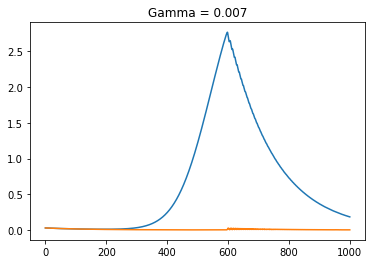

In [10]:
tau = 1000 # характерное время переключения
T = 1000 # полный интервал времени
dt = 0.01 # шаг по времени
t = np.linspace(0,T, int(T/dt))
energy_mean = []
energy_std = []
gamma = 0.007
# начальное распределение
np.random.seed(1997)
random_points = np.random.random(Num) # Num случайныйх равномерно распределеных чисел [0,1]
phi_points = inter_func(random_points) # значения phi c требуемым распределением
p_points = np.random.normal(0, np.sqrt(beta), Num)
# главный цикл
for it in tqdm(t):
    k1 = F(it, phi_points, p_points)
    k2 = F(it+dt/2, phi_points + dt*k1[0]/2, p_points + dt*k1[1]/2)
    k3 = F(it+dt/2, phi_points + dt*k2[0]/2, p_points + dt*k2[1]/2)
    k4 = F(it+dt, phi_points + dt*k3[0], p_points + dt*k3[1])
    phi_points = phi_points + dt*(k1[0]+2*k2[0]+2*k3[0]+k4[0])/6
    p_points = p_points + dt*(k1[1]+2*k2[1]+2*k3[1]+k4[1])/6
    energy_mean.append(np.mean(H(it, phi_points, p_points)))
    energy_std.append(np.std(H(it, phi_points, p_points)))

plt.plot(t, energy_mean, label = 'energy_mean')
plt.plot(t, energy_std, label = 'energy_std')
plt.title('Gamma = {}'.format(gamma))
plt.show()

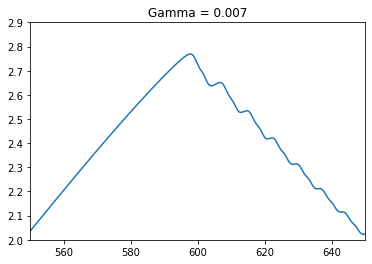

In [16]:
plt.plot(t, energy_mean, label = 'energy_mean')
#plt.plot(t, energy_std, label = 'energy_std')
plt.xlim(550, 650)
plt.ylim(2, 2.9)
plt.title('Gamma = {}'.format(gamma))
plt.show()

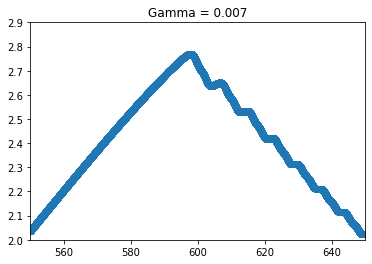

In [21]:
# что и выше, но в точках
plt.plot(t, energy_mean,'o') 
#plt.plot(t, energy_std, label = 'energy_std')
plt.xlim(550, 650)
plt.ylim(2, 2.9)
plt.title('Gamma = {}'.format(gamma))
plt.show()


100%|███████████████████████████████████████████████████████████████████████████████| 51/51 [1:52:31<00:00, 132.39s/it]


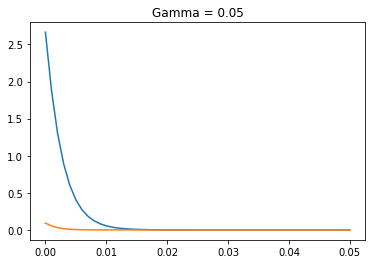

In [21]:
# средняя энергия в момент t = tau (чтобы избежать зависимоти от длины интервала "установления") для разных гамма
# ранее было установлено, что для бездиссипативного случая в момент t = tau система принимает наибольшее значение энергии
g = np.arange(0, 0.051, 0.001)
energy_mean = []
energy_std = []

for gamma in tqdm(g):
    # начальное распределение
    np.random.seed(1997)
    random_points = np.random.random(Num) # Num случайныйх равномерно распределеных чисел [0,1]
    phi_points = inter_func(random_points) # значения phi c требуемым распределением
    p_points = np.random.normal(0, np.sqrt(beta), Num)
    # главный цикл
    for it in t:
        k1 = F(it, phi_points, p_points)
        k2 = F(it+dt/2, phi_points + dt*k1[0]/2, p_points + dt*k1[1]/2)
        k3 = F(it+dt/2, phi_points + dt*k2[0]/2, p_points + dt*k2[1]/2)
        k4 = F(it+dt, phi_points + dt*k3[0], p_points + dt*k3[1])
        phi_points = phi_points + dt*(k1[0]+2*k2[0]+2*k3[0]+k4[0])/6
        p_points = p_points + dt*(k1[1]+2*k2[1]+2*k3[1]+k4[1])/6
    energy_mean.append(np.mean(H(it, phi_points, p_points)))
    energy_std.append(np.std(H(it, phi_points, p_points)))

plt.plot(g, energy_mean, label = 'energy_mean')
plt.plot(g, energy_std, label = 'energy_std')
plt.show()

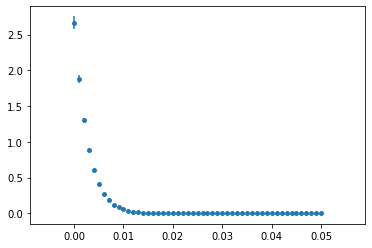

In [43]:
yerr = energy_std
plt.scatter(g, energy_mean, s = 15)
plt.errorbar(g, energy_mean, yerr = yerr, label = 'energy_mean', ls = 'None')
plt.xlabel('gamma')
plt.ylabel('<E>')
plt.show()